In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
load_dotenv() ## activating up all the secret variables

True

In [3]:
llm = ChatOpenAI()

In [ ]:
llm.invoke("what is data science").content ## the llm is working fine

'Data science is a multidisciplinary field that deals with extracting insights and knowledge from data using various tools and techniques. It combines expertise from fields such as statistics, computer science, mathematics, and domain-specific knowledge to analyze and interpret complex data sets. Data science involves collecting, cleaning, and processing large volumes of data to identify patterns, trends, and relationships that can be used to make informed business decisions or generate new insights. It also includes techniques such as machine learning, data mining, and data visualization to derive value from data.'

In [5]:
class State(StateGraph):
    question:str
    answer:str
    

In [7]:
def get_response(state:State)->dict:
    question = state["question"]
    answer = llm.invoke(question).content
    return {"answer":answer}

In [8]:
workflow = StateGraph(State)
workflow.add_node("get_response",get_response)
workflow.add_edge(START,"get_response")
workflow.add_edge("get_response",END)

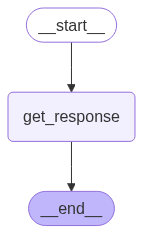

In [9]:
workflow.compile()